## Predicción del abandono Churn: Toma 2

La pérdida de clientes es un problema a la cual se enfrentan diversas empresas. Generalmente esta cantidad se mide en porcentaje de manera mensual (churn rate) y se refiere al porcentaje de clientes que han cancelado el servicio o dejado de consumir tu producto. Tan crítico es calcular el churn rate como conocer las razones por las que un cliente deja de consumir tu producto o servicio. Esto dará pistas para mejorar e ir reduciendo la tasa de abandono gradualmente.

Proyecto: Predicción del abandono para Telecom Co.
Telecom Co, es una empresa que ofrece serviciso de teléfono e internet que enfrenta el problema de abandono de clientes. Es decir, los clientes han decidido ya no emplear los servicios de Telcom y ha optado por otro proveedor. Con el fin de prevenir que esto siga sucediendo, desarrollaremos un sistema que nos ayude a identificar el abandono de clientes para ofrecerles algun incentivo para que se queden con Telecom Co.
Descargaremos los datos del sitio WEB Kaggle.com. Es necesario regitrarse con un email. https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
# Cargamos nuestras librerias

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Cargamos los datos
data=pd.read_csv("https://raw.githubusercontent.com/Albertuff/Machine-Learning/master/datos/Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.TotalCharges=pd.to_numeric(data.TotalCharges, errors="coerce")
data.TotalCharges= data.TotalCharges.fillna(0)
# Cuando ponemos errors= "coerce" Pandas automáticamente convierte los tipos de datos no numéricos en NaN (Not a Number)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Uniformizar los nombres de los atributos, que comiencen con mayúsculas y que no existan espacios en blanco 
data.columns=data.columns.str.lower().str.replace(" ","_")

In [7]:
# También los hacemos en las variables cadena, para que las respuestas capturadas sigan la misma sintaxis, 
# en minúsculas y sin espacios
string_columns= list(data.dtypes[data.dtypes=="object"].index) # seleccionamos las variables object
for col in string_columns :
    data[col] = data[col].str.lower().str.replace(" ","_")

In [8]:
data.churn=(data.churn=="yes").astype(int) 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# Preparación dataset.
Vamos a simular un análisis. Dividimos al conjunto de datos en tres subconjuntos: Entrenamiento, Validación y Prueba. Posteriormente realizaremos el análisis completo a través de una validación cruzada. 

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=1234)

In [11]:
y_train=train.churn
y_test=test.churn
del train["churn"]
del test["churn"]


# En el EDA
Lo primordias es que tengamos un objetivo que perseguir con los datos, es decir, que nos indiquen qué se quiere conseguir con los datos. Por ejemplo: _Predecir ventas_, _Calsificar clientes_, _Qué tipo de compra hará el cliente_, _identificar audiencias_, _detectar fraudes_, etc.
Cuanto tenemos el archivo, lo primero que habrá que revisar es:
* Cuántos registros hay? ¿tenemos filas completas o tenemos valores nulos?
* Es toda la información útil o habrá que desechar alguna?
* Identificar los tipos de datos, ¿cuáles son discretos y cuáles son nulos?
* Para el caso de aprendizaje supervisado. ¿Cuál es la variable de salida u objetivo?, ¿es binaria o múltiple?
* Está balanceado el conjunto de salida?
* ¿Qué atributos son importantes?  ¿Cuáles podemos descartar?
* ¿Siguen alguna distribución de probabilidad?
* Existe correlación entre los atributos?
* Existen valores atípicos? Podemos eliminarlos o es importante conservarlos? ¿Son valores reales o se deben a errores de captura?

Entre más conocimiento inicial tengamos de los datos y del problema será mejor el modelo que podamos construir.

In [12]:
# Un análisis descriptivo inicial
data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [13]:
#¿Tenemos datos faltantes?
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
#Distribución de la variable objetivo
data.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [15]:
# Observamos que tenemos una proporción de abandono del
1869/(1869+5174)

0.2653698707936959

In [16]:
# También podemos hacer lo siguiente
churn_ratio=data.churn.mean()
round(churn_ratio,3)

0.265

Tanto las variables categóricas como las continuas de nuestro dataset son importantes pero necesitan estudios diferenciados. Vamos a crear dos listas de atributos, una para los atributos continuos y otra para los atributos categóricos.

In [17]:
categoricas=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
continuas=['tenure','monthlycharges', 'totalcharges']

In [18]:
# Cuántos niveles tiene cada atributio categórico?
data[categoricas].nunique()


gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Atributos de importancia
Qué atributos influyen la variable objetivo. Entender qué factores afectan la variable objetivo nos permitirá construir un mejor modelo. ¿Qué hace que un cliente abandone? ¿Cuáles son las características que tienen los clientes que abandonan?
Debido a que tenemos atributos continuos y discretos, será diferente la manera de medir el impacto en el abandono.

In [19]:
# Revisemos primero el género.
ratio_churn_females=data[data.gender=="female"].churn.mean() 
print("Proporción de mujeres que abandonan: {:.3f}".format(ratio_churn_females))
ratio_churn_males=data[data.gender=="male"].churn.mean() 
print("Proporción de hombres que abandonan: {:.3f}".format(ratio_churn_males))


Proporción de mujeres que abandonan: 0.269
Proporción de hombres que abandonan: 0.262


In [20]:
# Revisemos partners
churn_partner_y=data[data.partner=="yes"].churn.mean() 
print("Proporción de clientes que comparten: {:.3f}".format(churn_partner_y))
churn_partner_n=data[data.partner=="no"].churn.mean() 
print("Proporción de clientes que no comparten: {:.3f}".format(churn_partner_n))


Proporción de clientes que comparten: 0.197
Proporción de clientes que no comparten: 0.330


Otra forma de medir las diferencias entre grupos, es comparar la razón de abandono por grupo con la razón global. Esto es, el riesgo del grupo en particular 

In [21]:
# Riesgo de abandono en mujeres:
data[data.gender=="female"].churn.mean()/data.churn.mean()


1.014466016021912

In [22]:
# Si el cociente es cercano a 1, entonces el grupo de clientes
# mujeres no se considera como de riesgo. Es decir, el grupo
# de clientes mujeres tienen la misma probabilidad de abandonar
# que cualquier otro tipo de cliente.

In [23]:
# Riesgo de abandono en hombres:
data[data.gender=="male"].churn.mean()/data.churn.mean()

0.9858066205669676

In [24]:
# Riesgo de abandono en clientes con servicio compartido:
data[data.partner=="no"].churn.mean()/data.churn.mean()

1.241963847619165

In [25]:
# Riesgo menor 1: Bajo riesgo.
# Riesgo igual a 1: no riesgo
# Riesgo mayor a 1: Grupo de riesgo
# Riesgo mayor a 2: Alto riesgo.

In [26]:
# Por grupo

churn_ratio=data.churn.mean()
df_grupo=data.groupby(by="gender").churn.agg(["mean"])
df_grupo["Diferencia"]=df_grupo["mean"]-churn_ratio
df_grupo["Riesgo"]=df_grupo["mean"]/churn_ratio
df_grupo


,mean,Diferencia,Riesgo
gender,,,
female,0.269209,0.003839,1.014466
male,0.261603,-0.003766,0.985807


In [27]:
# En general

from IPython.display import display

churn_ratio=data.churn.mean()

for col in categoricas:
    df_grupo=data.groupby(by=col).churn.agg(["mean"])
    df_grupo["Diferencia"]=df_grupo["mean"]-churn_ratio
    df_grupo["Riesgo"]=df_grupo["mean"]/churn_ratio
    display(df_grupo)


,mean,Diferencia,Riesgo
gender,,,
female,0.269209,0.003839,1.014466
male,0.261603,-0.003766,0.985807


,mean,Diferencia,Riesgo
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,mean,Diferencia,Riesgo
partner,,,
no,0.329580,0.064210,1.241964
yes,0.196649,-0.068721,0.741038


,mean,Diferencia,Riesgo
dependents,,,
no,0.312791,0.047422,1.178700
yes,0.154502,-0.110868,0.582215


,mean,Diferencia,Riesgo
phoneservice,,,
no,0.249267,-0.016103,0.939319
yes,0.267096,0.001726,1.006506


,mean,Diferencia,Riesgo
multiplelines,,,
no,0.250442,-0.014927,0.943749
no_phone_service,0.249267,-0.016103,0.939319
yes,0.286099,0.020729,1.078114


,mean,Diferencia,Riesgo
internetservice,,,
dsl,0.189591,-0.075779,0.714441
fiber_optic,0.418928,0.153558,1.578656
no,0.074050,-0.191320,0.279044


,mean,Diferencia,Riesgo
onlinesecurity,,,
no,0.417667,0.152297,1.573906
no_internet_service,0.074050,-0.191320,0.279044
yes,0.146112,-0.119258,0.550597


,mean,Diferencia,Riesgo
onlinebackup,,,
no,0.399288,0.133918,1.504645
no_internet_service,0.074050,-0.191320,0.279044
yes,0.215315,-0.050055,0.811377


,mean,Diferencia,Riesgo
deviceprotection,,,
no,0.391276,0.125906,1.474456
no_internet_service,0.074050,-0.191320,0.279044
yes,0.225021,-0.040349,0.847951


,mean,Diferencia,Riesgo
techsupport,,,
no,0.416355,0.150985,1.568960
no_internet_service,0.074050,-0.191320,0.279044
yes,0.151663,-0.113706,0.571517


,mean,Diferencia,Riesgo
streamingtv,,,
no,0.335231,0.069861,1.263261
no_internet_service,0.074050,-0.191320,0.279044
yes,0.300702,0.035332,1.133143


,mean,Diferencia,Riesgo
streamingmovies,,,
no,0.336804,0.071434,1.269188
no_internet_service,0.074050,-0.191320,0.279044
yes,0.299414,0.034044,1.128291


,mean,Diferencia,Riesgo
contract,,,
month-to-month,0.427097,0.161727,1.609440
one_year,0.112695,-0.152675,0.424672
two_year,0.028319,-0.237051,0.106714


,mean,Diferencia,Riesgo
paperlessbilling,,,
no,0.163301,-0.102069,0.615371
yes,0.335651,0.070281,1.264842


,mean,Diferencia,Riesgo
paymentmethod,,,
bank_transfer_(automatic),0.167098,-0.098271,0.629681
credit_card_(automatic),0.152431,-0.112939,0.574410
electronic_check,0.452854,0.187484,1.706502
mailed_check,0.191067,-0.074303,0.720003


Podemos ver que analizando las diferencias y el riesgo podemos identificar los atributos que mejor discriminan a los clientes que abandonan y los que no abandonan. Estos atributos serán parte importante para construir nuestro mejor modelo para identificar el abandono.

Analizar las diferencias como lo hemos hecho hasta ahora resulta muy útil para entender los datos pero, ¿qué características o atributos son más importantes?
Por ejemplo, ¿es el soporte técnico más util que el tipo de contrato?
Las _métricas de importancia_ nos pueden ayudar a media el grado de dependencia entre el atributo yla variable objetivo. 
Si dos varibales son dependientes, conociendo el valor de una de la variables podemos obtener información de la otra variable. Por otro lado, si el atributo es independiente de la variable objetivo, entonces podemos remover el atributo de nuestro análisis. 
En variables categóricas una de las métricas de importania es la métrica de _información mutua_ que nos indica que tanta información podemos obtener (aprender) de una variable si tenemos el valor de la la otra variable. Este es un copcepto de teoría de la información, y en Machine Learning, a menudo se emplea para media la dependencia entre dos variables.
Valores altos en la información mutua (MI) significa que existe un alto grado de dependencia: Si la MI entre una variable categórica (atributo) y la variable objetivo es alta, entonces, esta variable será útil para predecir la variable objetivo. Por otro lado, si la MI es baja, podemos considerar que la variable categórica (atributio) y la variable objetivo son independientes, es decir, dicho atributo no resultará util para construir nuestro modelo predictivo de abandono.
La métrica de información mutual está implementada en scikit-learn y podemos mediar esta dependencia entre nuestras variables.

In [28]:
from sklearn.metrics import mutual_info_score

def calcula_mut_infor(atributo):
    return mutual_info_score(atributo, data.churn)

df_mi=data[categoricas].apply(calcula_mut_infor)
df_mi=df_mi.sort_values(ascending=False).to_frame(name="MI_score")
df_mi



,MI_score
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792
paymentmethod,0.044519
deviceprotection,0.043917
streamingmovies,0.032001
streamingtv,0.031908
paperlessbilling,0.019194


# Coeficiente de correlación
Como hemos mencionado la MI es una medida de la dependencia entre dos variables categóricas, pero no funciona con variable continuas, es decir, no las podemos aplicar a las tres variables numéricas de nuestro dataset. 
Sin embargo, podemos medir la dependencia entre una variable binaria y una variable continua a través del coeficiente de correlación de Pearson, que es un valor entre -1 y 1. 

In [29]:
data[continuas].corrwith(data.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.198324
dtype: float64

# Ingeniería de los atributos
Con el panorama que tenemos hasta ahora de los datos hemos identificado que datos nos son útiles para construir el modelo. Después hemos analizado cómo los atributos afectan la variable objetivo.
Antes de pasar a entrenar a nuestro modelo, es necesario levar a cabo una _ingeniería de atributos:_ en este caso, trasnformar la variables categóricas a valores numéricos

# Dicotomizacón: One Hot Encoding

No podemos considerar los atributos categóricos y ponerlos dentro de nuestro modelo de Machine Learning. Los modelos funcionan únicamente con números en matrices. Asi que, necesitamos convertir los datos categóricos en una matriz de datos numéricos o codificarlos (encode).
Una de las técnicas de codificación es la llamada técnica de one-hot encodig. 
Por ejemplo, la variable contrato asume tres posibles categorias: mensual, anual y bianual. Podemos entonces respresantar un cliente con un contraro anual como (0,1,0). En este caso, el valor anula es activo o "hot" lo que representamos por 1, mientras que el resto de los valores está inactivo o "cold", es decir, son 0. 
Para hacer la codificación One-Hot, nos apoyamos de SciKit-Learn. 
Veamos una forma de implementarla a través de un diccionario.

In [30]:
#Solo en el conjunto de entrenamiento
train_dict=train[categoricas + continuas].to_dict(orient="records")
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'no',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 47,
  'monthlycharges': 94.8,
  'totalcharges': 4535.85},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 71,
  'monthlycharges': 99.2,
  'totalcharges': 7213.75},
 {'gender': '

In [31]:
# Veamos la primera entrada de nuestro diccionario
train_dict[0]
train_dict[0]["totalcharges"]

4535.85

In [32]:
# Ahora vamos a pasar nuestra "pila" de diccionarios a matriz

from sklearn.feature_extraction import DictVectorizer

dv=DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [33]:
X_vect=dv.transform(train_dict)

In [34]:
X_vect

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.70000e+01, 4.53585e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        7.10000e+01, 7.21375e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        6.40000e+01, 5.48440e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.00000e+00, 5.79000e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.00000e+00, 1.41500e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 4.46000e+01]])

In [35]:
# Podemos recuperar los nombres de las columnas a través del 
# método 
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_vect, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [37]:
# Hacemos predicciones para medir el desempeño del modelo
# utilizando el conjunto de validación

test_dict=test[categoricas+continuas].to_dict(orient="records")
X_test=dv.transform(test_dict)
y_pred=model.predict_proba(X_test)[:,1]

In [38]:
y_pred

array([0.12131331, 0.21362206, 0.00885513, ..., 0.36676952, 0.43615645,
       0.54912431])

In [39]:
# Exactitud
churn=y_pred>=0.5
(y_test==churn).mean()

0.7963094393186657

In [40]:
print(classification_report(y_test,churn))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1046
           1       0.63      0.52      0.57       363

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [41]:
# Interpretación de los coeficientes del modelo
# Vamos a probar en un subconjunto más pequeño
small=["contract", "tenure", "totalcharges"]

train_dict_small=train[small].to_dict(orient="records")
dv_small=DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)
X_small_train=dv_small.transform(train_dict_small)
dv_small.get_feature_names_out()

# Entrenamos nuestro modelo reducido
model_small=LogisticRegression(solver="liblinear", random_state=1)
model_small.fit(X_small_train,y_train)
print("Intercepto: ", model_small.intercept_[0])
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

Intercepto:  -0.7431513325381434


{'contract=month-to-month': 0.983,
 'contract=one_year': -0.308,
 'contract=two_year': -1.418,
 'tenure': -0.097,
 'totalcharges': 0.001}

In [42]:
print("Proba de abandono= ",y_train.mean())

Proba de abandono=  0.2673056443024494


In [43]:
# Interpretación del término independiente
print(1/(1+np.exp(-model_small.intercept_[0])))
# La probabilidad de que un cliente se quede cancele el servicio
# o abandone (éxito) es 32.56%.  
# Esto coincide con el imbalance en los datos, existen más
# clientes que se quedan. 

0.3223154188234286


De la observación de la sigmoide, es fácil interpretar qué tan indicativa es una variable en el modelo.

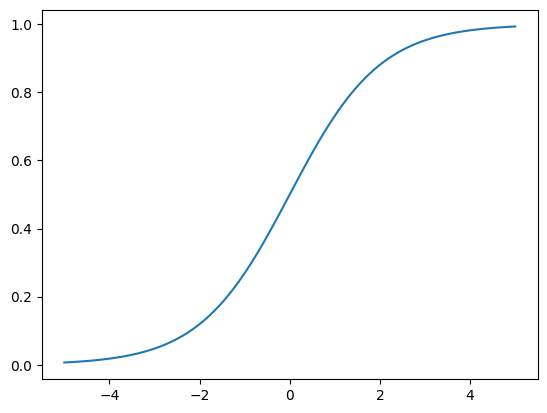

In [44]:
import matplotlib.pyplot as plt
x=np.linspace(-5, 5, 100)
plt.plot(x,1/(1+np.exp(-x)))

El signo del coeficiente es de importancia. Para un atributo cuyo peso tiene signo positivo, entonces ese atributo corresponde a un cliente con altas probabilidades de abandono (éxito), pero si es negativo, entonces ese es un atributo de un cliente que permanecerá con el servicio. 
El valor del coeficientes también es muy útil, entre más negativo sea el coeficiente, menor es la probabilidad de abandono, y entre más positivo sea el coeficiente, mayor la probabilidad de abandono. Y esto se confirma con el valor del coeficiente de correlación.

In [45]:
df=pd.DataFrame()
df["contrato"] = ["mes a mes", "un año", "dos años"]
df["coeficientes"]= [0.909,-0.145,-1.403]
df["Prob Churn"]=1/(1+np.exp(-df["coeficientes"]))
df
# ¿Cómo era la correlación entre contract y Churn?

,contrato,coeficientes,Prob Churn
0,mes a mes,0.909,0.712795
1,un año,-0.145,0.463813
2,dos años,-1.403,0.197340


# Cómo es con las continuas?
El peso del atributo tenure es -0.097, es negativo, indicativo de no abandono, la correlación entre tenure y churn es -0.35, es decir, que entre más tiempo el cliente permanezca con el servicio, la probabilidad de que abandone es menor. 
De hecho, la razón del OR(x+1)/OR(x) = exp(-0.097) 

In [46]:
np.exp(-0.097)

0.9075560061332727

Es decir, si un cliente se queda un mes más con el servicio, el OR de abandono (riesgo de abandono) es 0.90 veces el OR de abandono (riesgo de abandono) actual. O lo que es lo mismo, el OR disminuye en un 10%
Finalmente, para totalcharges, el coeficiente es casi cero, por lo cual no es relevante para el modelo.

In [47]:
#Ejemplo: consideremos un cliente con un contrato mensual, que ha estado
# un año con el servicio  y paga $1000. 
x_B=-0.7431+0.983*(1) +12*(-0.097)+0.001*1000
x_B
    

0.07589999999999986

In [48]:
# El signo negativo, es un indicador de que no es probable
# que abandone, 
p_churn= 1/(1+np.exp(-x_B))
p_churn

0.5189658959638138

In [49]:
#Ejemplo: consideremos ahora otro cliente con un contrato anual, que ha estado
# dos año con el servicio  y paga $2000. 
x_B=-0.7431-.308*(1) +24*(-0.097)+0.001*2000
x_B
    
# El signo negativo, es un indicador de que no es probable
# que abandone, 
p_churn= 1/(1+np.exp(-x_B))
p_churn

0.20115358259043398

In [50]:
# Para este cliente la probabilidad de abandono es mucho
# menor

In [51]:
# Evaluación del modelo
# Hacemos las predicciones del modelo_small
test_dict_small=test[small].to_dict(orient="records")
dv_small=DictVectorizer(sparse=False)
dv_small.fit(test_dict_small)
X_small_test=dv_small.transform(test_dict_small)
dv_small.get_feature_names_out()

y_pred_small=model_small.predict(X_small_test)
print(classification_report(y_test,y_pred_small))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1046
           1       0.57      0.50      0.53       363

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



In [52]:
# El areá bajo la curva del modelo reducido(tenure, contract,Totalcharges)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_small.predict_proba(X_small_test)[:, 1])

0.793738708131199

In [53]:
# El areá bajo la curva del modelo completo
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8270375403610236

In [54]:
# El 82% de las veces, el score es más alto para un cliente que abandona que para un cliente que no abandona

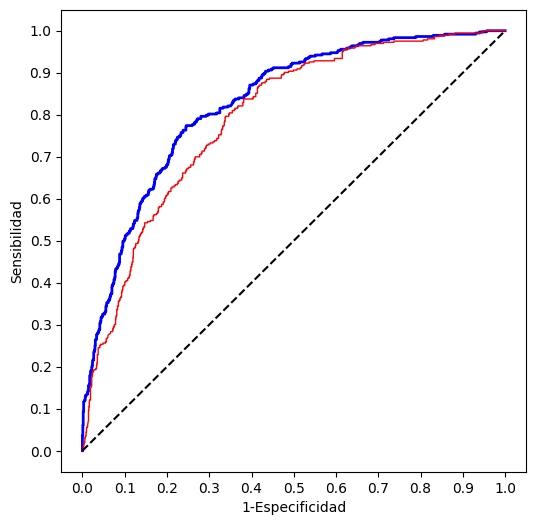

In [55]:
from sklearn.metrics import roc_curve
scores=model.predict_proba(X_test)[:, 1]
scores2=model_small.predict_proba(X_small_test)[:, 1]
FPR, TPR, Thresholds = roc_curve(y_test, scores)
FPR2, TPR2, Thresholds = roc_curve(y_test, scores2)
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(FPR, TPR, linewidth = 2, color="blue")
plt.plot(FPR2, TPR2, linewidth = 1, color="red")
plt.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel("1-Especificidad", fontsize = 10)
ax.set_ylabel("Sensibilidad", fontsize = 10)
ax.set_xticks(np.linspace(0, 1, 11));
ax.set_yticks(np.linspace(0, 1, 11));

In [56]:
# Validación del modelo
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score # Validación cruzada
from sklearn.model_selection import GridSearchCV
X=data[categoricas+continuas]
y=data.churn

In [57]:
# Preprocesamiento de los datos: Binarizando los atributos categóricos
X_dict=X.to_dict(orient="records")
dv=DictVectorizer(sparse=False)
dv.fit(X_dict)
X_dict=dv.transform(X_dict)
dv_small.get_feature_names_out()
X_dict=pd.DataFrame(X_dict,columns=dv.get_feature_names_out())
X_dict

,contract=month-to-month,contract=one_year,contract=two_year,dependents=no,dependents=yes,deviceprotection=no,deviceprotection=no_internet_service,deviceprotection=yes,gender=female,gender=male,...,streamingmovies=no_internet_service,streamingmovies=yes,streamingtv=no,streamingtv=no_internet_service,streamingtv=yes,techsupport=no,techsupport=no_internet_service,techsupport=yes,tenure,totalcharges
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,34.0,1889.50
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,108.15
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45.0,1840.75
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,24.0,1990.50
7039,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,72.0,7362.90
7040,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,346.45
7041,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,306.60


In [58]:
# Definimos el modelo
model=LogisticRegression(solver="liblinear", random_state=1)

# Definimos el esquema de validaciòn cruzada
cv=KFold(n_splits=10, random_state=1234, shuffle=True)

scores=cross_val_score(model,X_dict,y,scoring="roc_auc",cv=cv,n_jobs=-1)
print("AUC ={:.3f} +/- {:.3f}".format(scores.mean(), scores.std()))
print(scores)

AUC =0.845 +/- 0.017
[0.81210404 0.84115251 0.8450127  0.85149465 0.84350093 0.85145555
 0.87226827 0.84295452 0.86441737 0.82462739]


In [59]:
# Calibración del hiperparámetro de complejidad: C
espacio_param={"C":[0.001,0.01,0.1,0.5,1,10]}

# Definimos el modelo
model=LogisticRegression(solver="liblinear", random_state=1)

# Rejilla
rejilla=GridSearchCV(model,param_grid=espacio_param,scoring="roc_auc",cv=10,n_jobs=-1)
rejilla.fit(X_dict,y)

# Imprimimos los resultados
print("Mejor configuración del parámetro de regularización: ",rejilla.best_params_)
print("Mejor valor de la métrica:",rejilla.best_score_)

Mejor configuración del parámetro de regularización:  {'C': 0.5}
Mejor valor de la métrica: 0.8450170029929737


In [60]:
# Definimos el modelo
modelo_final=LogisticRegression(C=0.1,solver="liblinear", random_state=1)
modelo_final.fit(X_dict,y)

LogisticRegression(C=0.1, random_state=1, solver='liblinear')

In [61]:
#Predicciones
datos_nuevos=pd.read_csv("https://raw.githubusercontent.com/Albertuff/Machine-Learning/master/Modulo%202/datos/churn_nuevos.csv")

In [62]:
# Uniformizar los nombres de los atributos, que comiencen con mayúsculas y que no existan espacios en blanco 
datos_nuevos.columns=datos_nuevos.columns.str.lower().str.replace(" ","_")
string_columns= list(datos_nuevos.dtypes[datos_nuevos.dtypes=="object"].index) # seleccionamos las variables object
for col in string_columns :
    datos_nuevos[col] = datos_nuevos[col].str.lower().str.replace(" ","_")

In [63]:
# Preprocesamiento de los datos
X_dict_nuevos=datos_nuevos.to_dict(orient="records")
dv=DictVectorizer(sparse=False)
dv.fit(X_dict_nuevos)
X_dict_nuevos=dv.transform(X_dict_nuevos)
dv.get_feature_names_out()
X_dict_nuevos=pd.DataFrame(X_dict_nuevos,columns=dv.get_feature_names_out())
X_dict_nuevos


,contract=month-to-month,contract=one_year,contract=two_year,dependents=no,dependents=yes,deviceprotection=no,deviceprotection=no_internet_service,deviceprotection=yes,gender=female,gender=male,...,streamingmovies=no_internet_service,streamingmovies=yes,streamingtv=no,streamingtv=no_internet_service,streamingtv=yes,techsupport=no,techsupport=no_internet_service,techsupport=yes,tenure,totalcharges
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,34.0,1889.50
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,108.15
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45.0,1840.75
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,151.65
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,820.50
6,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,22.0,1949.40
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,301.90
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,28.0,3046.05
9,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,62.0,3487.95


In [64]:
modelo_final.predict_proba(X_dict)[:,1]

array([0.65829387, 0.03954987, 0.28295455, ..., 0.42728383, 0.70722786,
       0.05967965])

In [65]:
modelo_final.predict(X_dict)

array([1, 0, 0, ..., 0, 1, 0])

In [66]:
# Este modelo tiene la propiedad de que con un probabilidad del 85% diferencia a los clientes que vana a cancelar de los que no van a cancerlar

In [67]:
# Calibración del hiperparámetro de complejidad: C
espacio_param={"C":[0.001,0.01,0.1,0.5,1,10]}

# Definimos el modelo
model=LogisticRegression(solver="liblinear", random_state=1)

# Rejilla
rejilla=GridSearchCV(model,param_grid=espacio_param,scoring="recall",cv=10,n_jobs=-1)
rejilla.fit(X_dict,y)

# Imprimimos los resultados
print("Mejor configuración del parámetro de regularización: ",rejilla.best_params_)
print("Mejor valor de la sensibilidad:",rejilla.best_score_)

Mejor configuración del parámetro de regularización:  {'C': 0.1}
Mejor valor de la sensibilidad: 0.5479242136737393


In [68]:
# El modelo que estimamos tiene una sensibilidad del 55%, es decir, del total de lcientes que van a cancelar, el modelo identifica correctamente al 55%
# Importante: Las predicciones son las mismas, porque el hiperparametro C fue el mismo

In [69]:
# Calibración del hiperparámetro de complejidad: C
espacio_param={"C":[0.001,0.01,0.1,0.5,1,10]}

# Definimos el modelo
model=LogisticRegression(solver="liblinear", random_state=1,class_weight="balanced")

# Rejilla
rejilla=GridSearchCV(model,param_grid=espacio_param,scoring="recall",cv=10,n_jobs=-1)
rejilla.fit(X_dict,y)

# Imprimimos los resultados
print("Mejor configuración del parámetro de regularización: ",rejilla.best_params_)
print("Mejor valor de la métrica:",rejilla.best_score_)

Mejor configuración del parámetro de regularización:  {'C': 0.5}
Mejor valor de la métrica: 0.8020412857225001


In [70]:
# El modelo que ahora construimos tiene la capaccidad de clasificar correctamente como clientes que cancelan al 80% de los clientes que en realidad cancelan

In [71]:
# Definimos el modelo
modelo_final=LogisticRegression(C=0.5,solver="liblinear", random_state=1)
modelo_final.fit(X_dict,y)

LogisticRegression(C=0.5, random_state=1, solver='liblinear')

In [72]:
modelo_final.predict_proba(X_dict_nuevos)[:,1]

array([0.66341037, 0.03721108, 0.27200606, 0.02475131, 0.7099701 ,
       0.79134763, 0.46574606, 0.29264729, 0.59319875, 0.00930754,
       0.19072466, 0.03956794, 0.16482261, 0.40117531, 0.41374818,
       0.04088385, 0.00784144, 0.0611177 , 0.1545573 , 0.557013  ,
       0.76705995, 0.06806977, 0.18976384, 0.0197639 , 0.01969228,
       0.10746889, 0.47813241, 0.52799648, 0.01754129])

In [73]:
modelo_final.predict(X_dict)

array([1, 0, 0, ..., 0, 1, 0])

In [74]:
# En las predicciones tenemos las certeza de que el 80% de los clientes que van a cancelar estén predichos como 1 por el modelo.